In [3]:
import pandas as pd
import numpy as np

# 1. Load predicted demand
df = pd.read_csv("data/predicted_demand_output.csv")

# 2. Base parameters
BASE_PRICE = 2.5      # base ticket price
ALPHA = 0.2           # price sensitivity factor

# 3. Compute average demand
avg_demand = df["Predicted_Demand"].mean()

# 4. Dynamic pricing formula
df["Dynamic_Price"] = BASE_PRICE * (
    1 + ALPHA * (df["Predicted_Demand"] - avg_demand) / avg_demand
)

# 5.enforce price bounds (realistic policy constraint)
df["Dynamic_Price"] = df["Dynamic_Price"].clip(lower=1.5, upper=4.0)

# 6. Save output

df.to_csv("data/dynamic_pricing_output.csv", index=False)

print("Dynamic pricing generated successfully.")
df.head()


Dynamic pricing generated successfully.


,Actual_Demand,Predicted_Demand,Dynamic_Price
0,246.833333,228.79657,2.287590
1,338.666667,296.53146,2.372731
2,430.500000,362.09537,2.455143
3,522.333333,424.80084,2.533961
4,614.166667,485.36276,2.610086


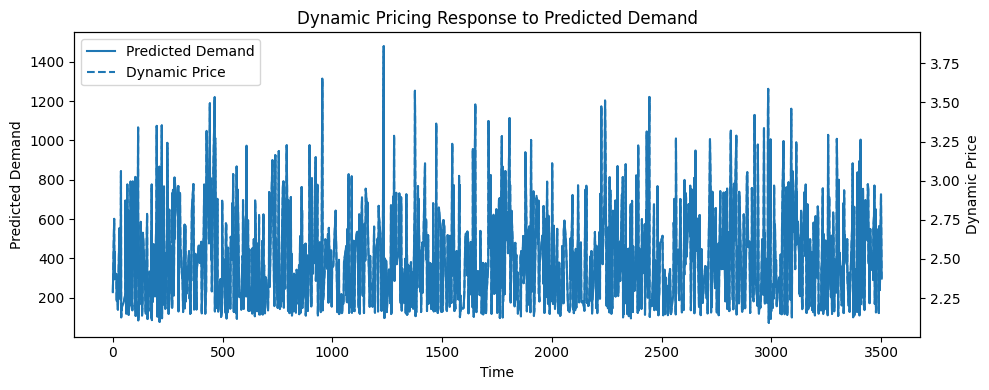

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,4))

# Predicted Demand
ax1.plot(df["Predicted_Demand"], label="Predicted Demand")
ax1.set_xlabel("Time")
ax1.set_ylabel("Predicted Demand")
ax1.tick_params(axis='y')

# Dynamic Price
ax2 = ax1.twinx()
ax2.plot(df["Dynamic_Price"], linestyle='--', label="Dynamic Price")
ax2.set_ylabel("Dynamic Price")
ax2.tick_params(axis='y')

# Title
plt.title("Dynamic Pricing Response to Predicted Demand")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")
plt.tight_layout()
plt.show()


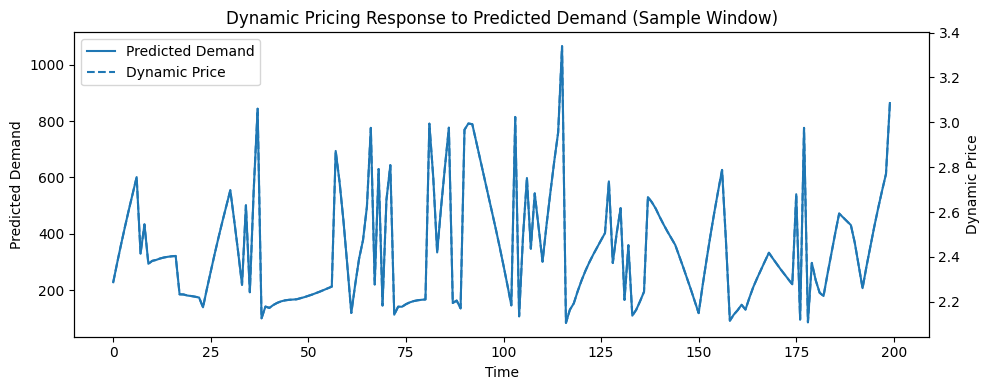

In [9]:
window = 200
fig, ax1 = plt.subplots(figsize=(10,4))

# Predicted Demand
line1, = ax1.plot(
    df["Predicted_Demand"][:window],
    label="Predicted Demand"
)
ax1.set_xlabel("Time")
ax1.set_ylabel("Predicted Demand")

# Dynamic Price
ax2 = ax1.twinx()
line2, = ax2.plot(
    df["Dynamic_Price"][:window],
    linestyle="--",
    label="Dynamic Price"
)
ax2.set_ylabel("Dynamic Price")
ax1.legend([line1, line2], ["Predicted Demand", "Dynamic Price"], loc="upper left")

plt.title("Dynamic Pricing Response to Predicted Demand (Sample Window)")
plt.tight_layout()
plt.show()
